## Autogen examples

Notebook covers simple autogen examples shared on https://microsoft.github.io/autogen/docs/tutorial/ 

Note- this doesnt use requirement.txt and aoai-poc venv

In [2]:
#use requirements_e7.txt to install the required packages

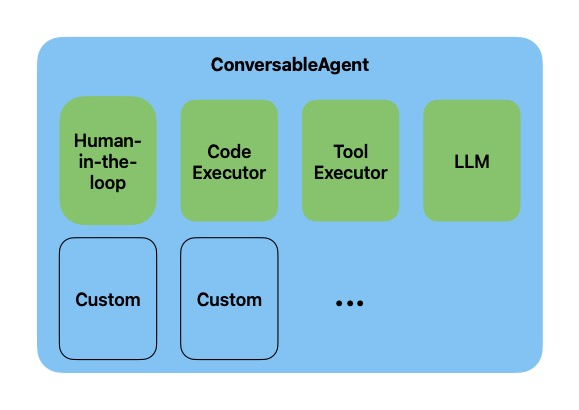

In [1]:
import os
import dotenv
from autogen import ConversableAgent
import openai

dotenv.load_dotenv("..\\common\\credentials.env", override=True)

True

Default config for autogen points to open ai format APIs. 
To use azure API's set config as below

In [2]:
aoai_endpoint = os.environ["AZURE_OPENAI_ENDPOINT"]
aoai_api_key = os.environ["AZURE_OPENAI_API_KEY"]
aoai_api_type = os.environ["OPENAI_API_TYPE"]
deployment_name = "gpt-35-turbo"
aoai_api_version = "2024-02-15-preview" #Using latest version as of this date. Older versions may not work with the code as syntax has changed drastically.

config_list = [
    {
        "model": deployment_name,  
        "base_url": aoai_endpoint, 
        "api_type": aoai_api_type, 
        "api_version": aoai_api_version, 
        "api_key": aoai_api_key,
        "temperature": 0.7
 }
]

1. Conversable Agent - w/o human input example

In [5]:
cathy = ConversableAgent(
    "cathy",
    system_message="Your name is Cathy and you are a part of a duo of comedians.",
    llm_config={"config_list": config_list},
    human_input_mode="NEVER",  # Never ask for human input.
)

joe = ConversableAgent(
    "joe",
    system_message="Your name is Joe and you are a part of a duo of comedians.",
    llm_config={"config_list": config_list},
    human_input_mode="NEVER",  # Never ask for human input.
)

In [6]:
result = joe.initiate_chat(cathy, message="Cathy, tell me a joke.", max_turns=2)

joe (to cathy):

Cathy, tell me a joke.

--------------------------------------------------------------------------------
cathy (to joe):

Sure! Why don't skeletons fight each other? They don't have the guts!

--------------------------------------------------------------------------------
joe (to cathy):

Haha, that's a good one, Cathy! Here's another one for you: Why don't we ever tell secrets on a farm? Because the potatoes have eyes and the corn has ears!

--------------------------------------------------------------------------------
cathy (to joe):

Haha, I love it! Thanks for sharing, Joe! We make a great comedy duo, don't we?

--------------------------------------------------------------------------------


2. Human in the loop Example. HUMAN INPUT MODE = NEVER

In [5]:
agent_with_number = ConversableAgent(
    "agent_with_number",
    system_message="You are playing a game of guess-my-number. You have the "
    "number 53 in your mind, and I will try to guess it. "
    "If I guess too high, say 'too high', if I guess too low, say 'too low'. ",
    llm_config={"config_list": config_list},
    is_termination_msg=lambda msg: "53" in msg["content"],  # terminate if the number is guessed by the other agent
    human_input_mode="NEVER",  # never ask for human input
)

agent_guess_number = ConversableAgent(
    "agent_guess_number",
    system_message="I have a number in my mind, and you will try to guess it. "
    "If I say 'too high', you should guess a lower number. If I say 'too low', "
    "you should guess a higher number. ",
    llm_config={"config_list": config_list},
    human_input_mode="NEVER",
)

result = agent_with_number.initiate_chat(
    agent_guess_number,
    message="I have a number between 1 and 100. Guess it!",
)

agent_with_number (to agent_guess_number):

I have a number between 1 and 100. Guess it!

--------------------------------------------------------------------------------
agent_guess_number (to agent_with_number):

Is your number 50?

--------------------------------------------------------------------------------
agent_with_number (to agent_guess_number):

Too low

--------------------------------------------------------------------------------
agent_guess_number (to agent_with_number):

Is your number 75?

--------------------------------------------------------------------------------
agent_with_number (to agent_guess_number):

Too high

--------------------------------------------------------------------------------
agent_guess_number (to agent_with_number):

Is your number 62?

--------------------------------------------------------------------------------
agent_with_number (to agent_guess_number):

Too high

-----------------------------------------------------------------------

The guessing agent got the number correctly using binary search – very efficient! You can see that the conversation was terminated after the guessing agent said the correct number, which triggered the message-based termination condition.

Now, HUMAN INPUT MODE = ALWAYS example. (requires return prompt from user)

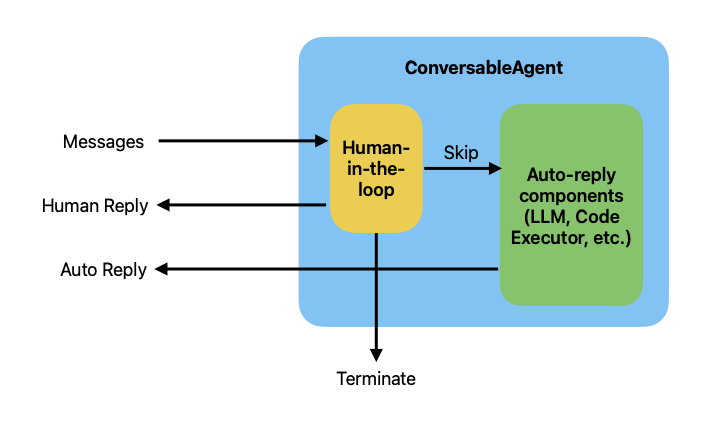

In [6]:
# human_proxy = ConversableAgent(
#     "human_proxy",
#     llm_config=False,  # no LLM used for human proxy
#     human_input_mode="ALWAYS",  # always ask for human input
# )

# # Start a chat with the agent with number with an initial guess.
# result = human_proxy.initiate_chat(
#     agent_with_number,  # this is the same agent with the number as before
#     message="10",
# )